In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
data = pd.read_csv('input/Shakespeare_data.csv')

In [147]:
data['Player'].replace(np.nan, 'Other',inplace = True)
data.head(5)

,Data-line,Play,Player Line number,Act-Scene-Line,Player,Player-Line
0,1,Henry IV,NaN,NaN,Other,ACT I
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [148]:
print("Number of plays are: " + str(data['Play'].nunique()))

Number of plays are: 36


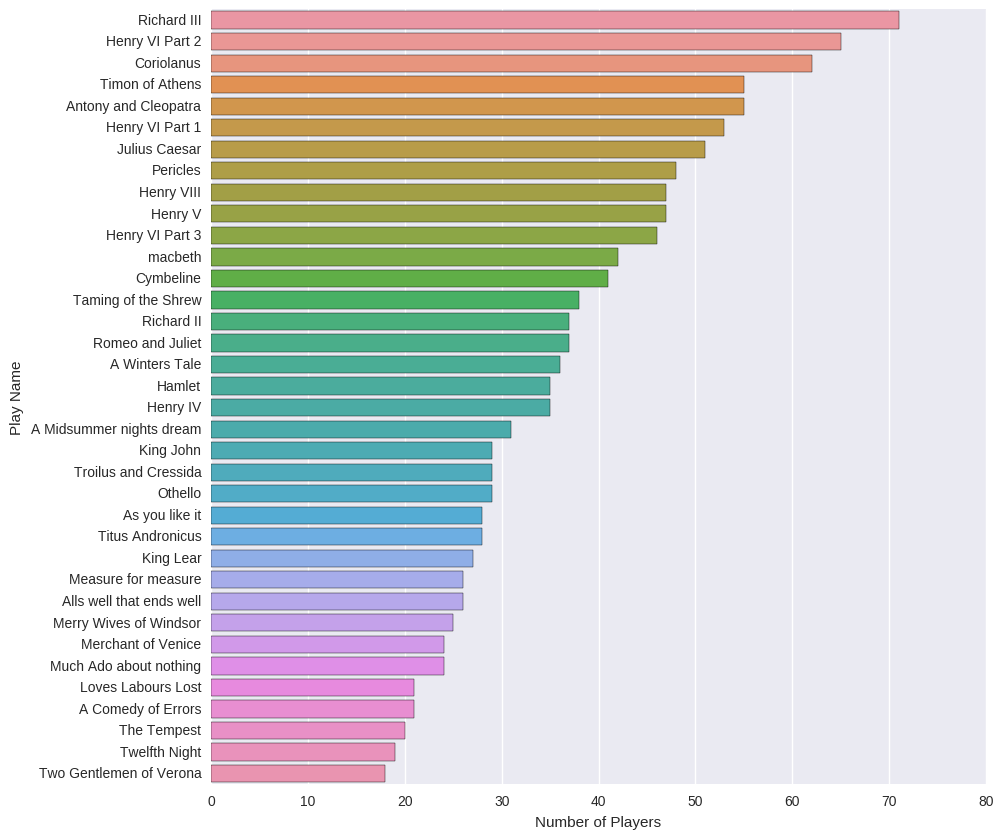

In [4]:
numberPlayers = data.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()

numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']

numberPlayers.index= np.arange(0,len(numberPlayers))
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()

/home/nishant/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/nishant/.local/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


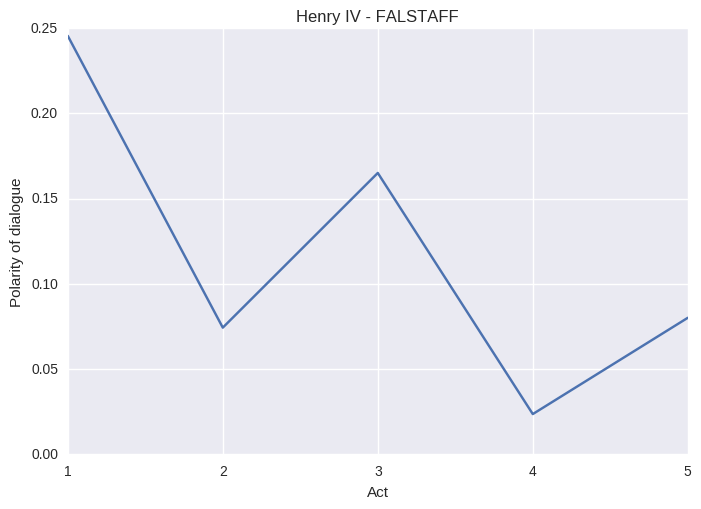

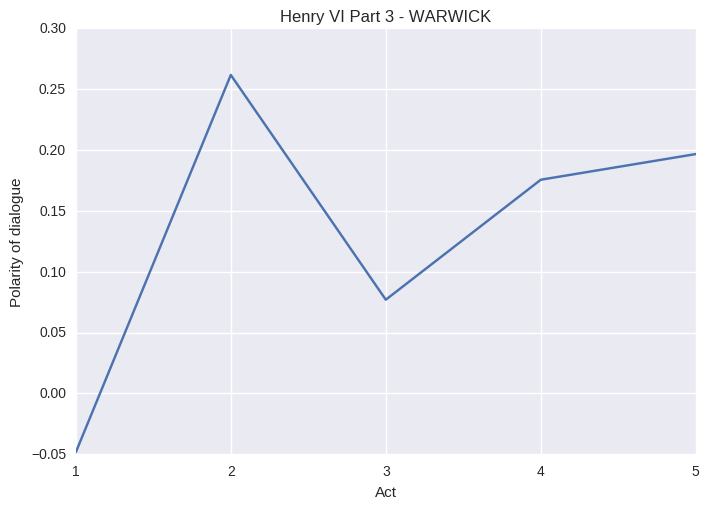

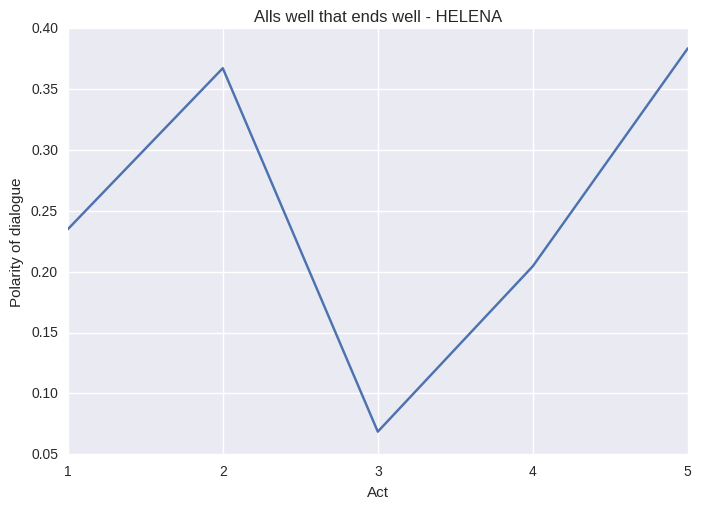

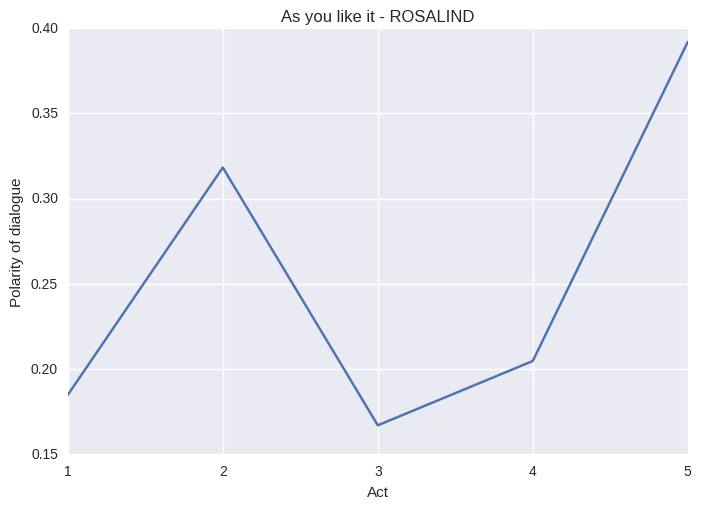

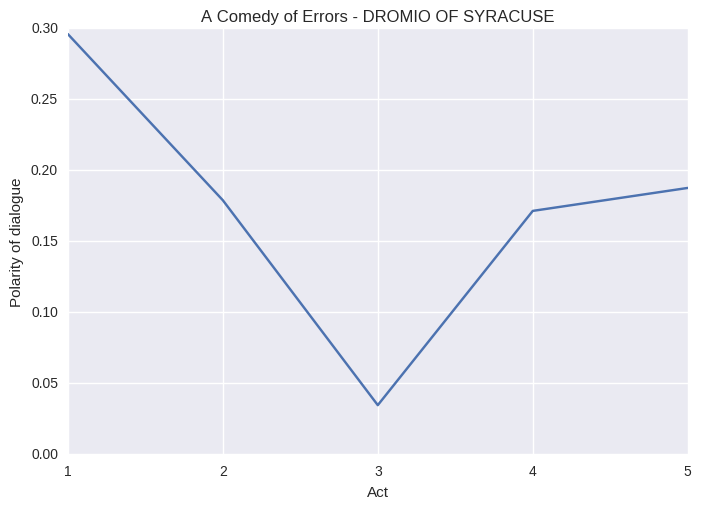

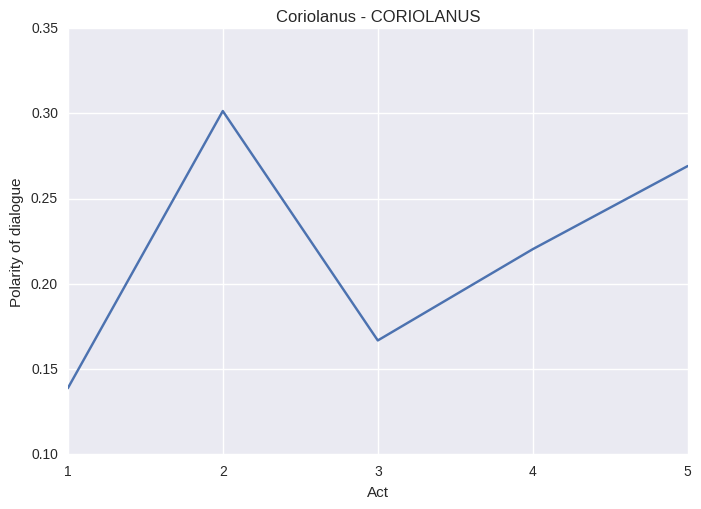

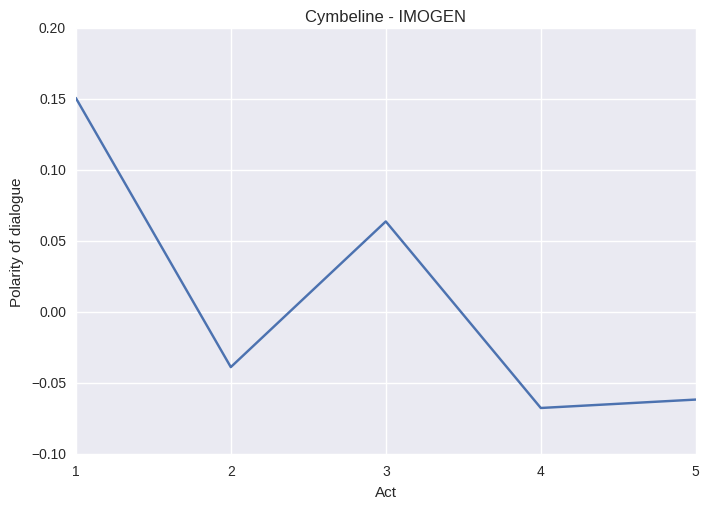

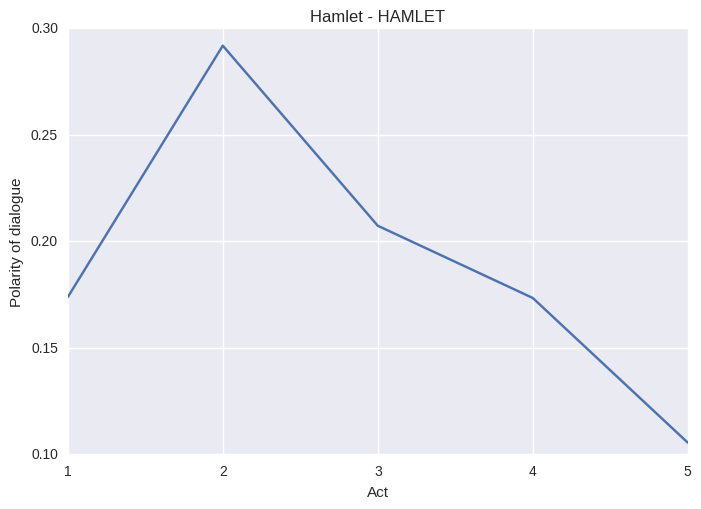

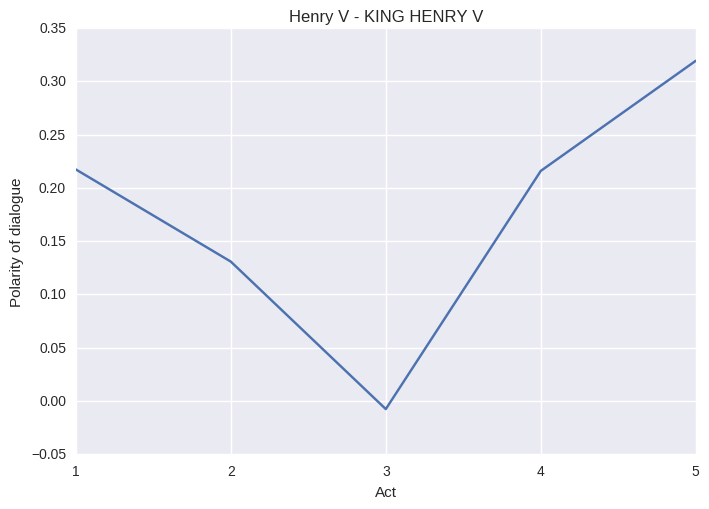

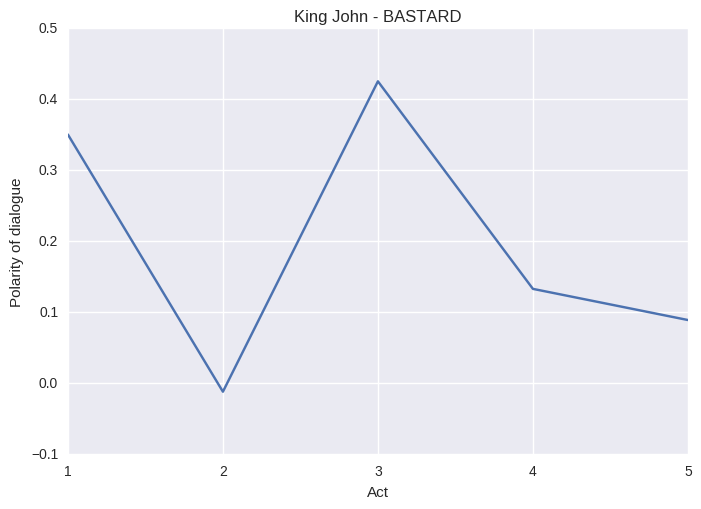

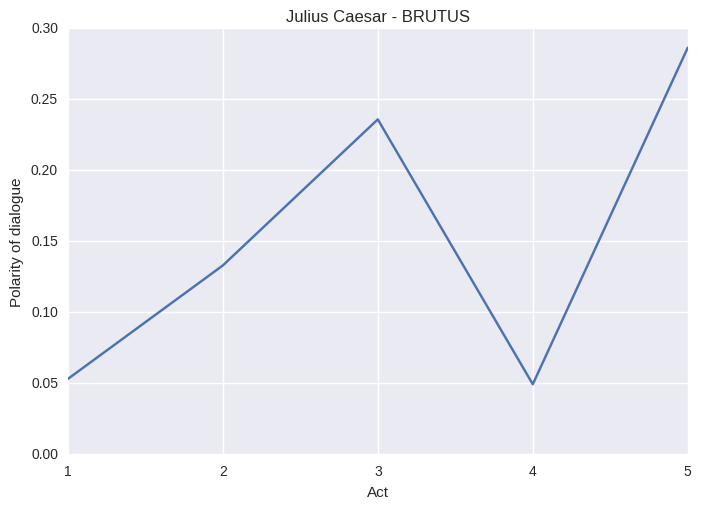

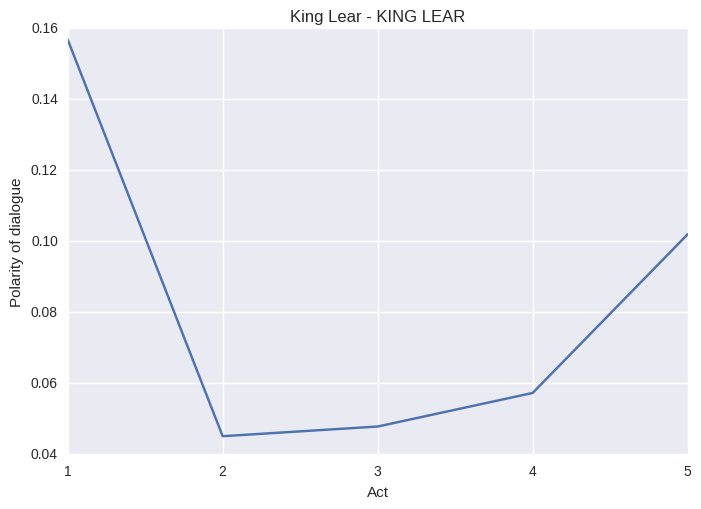

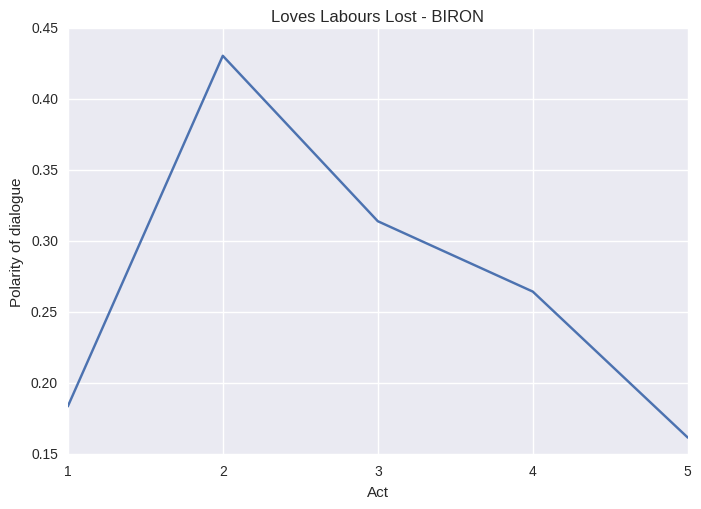

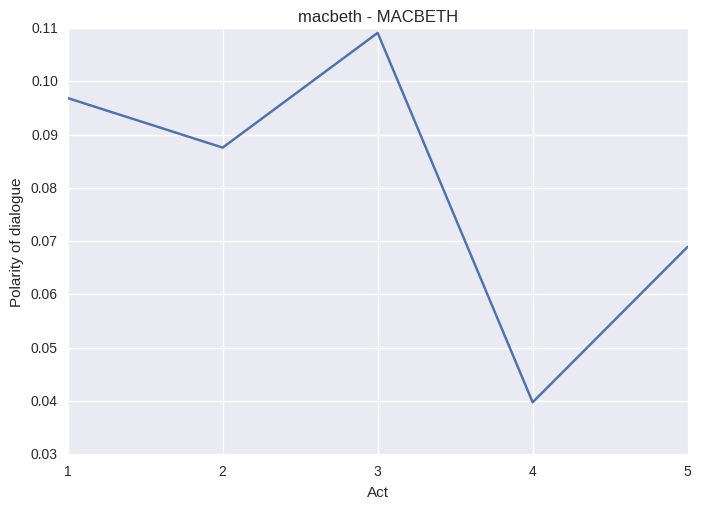

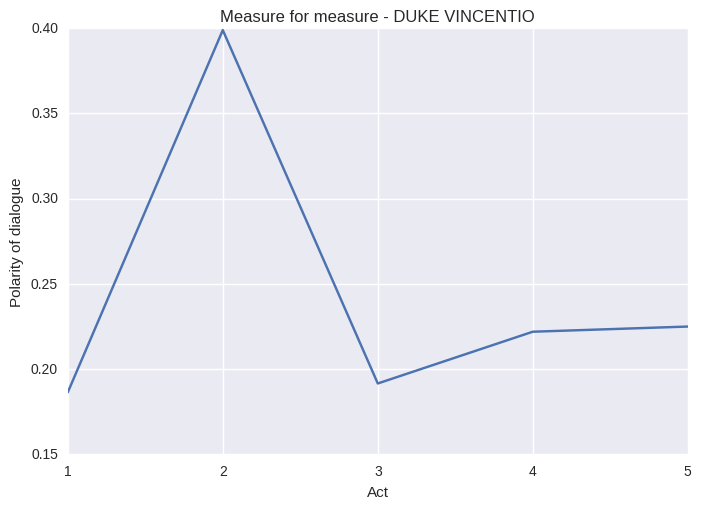

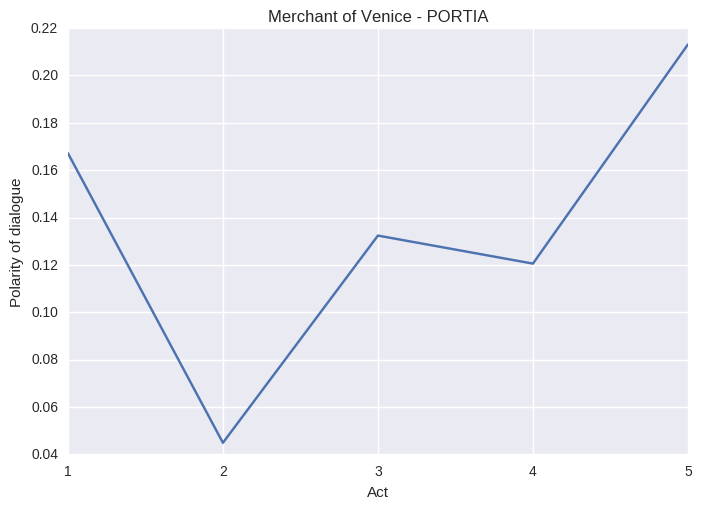

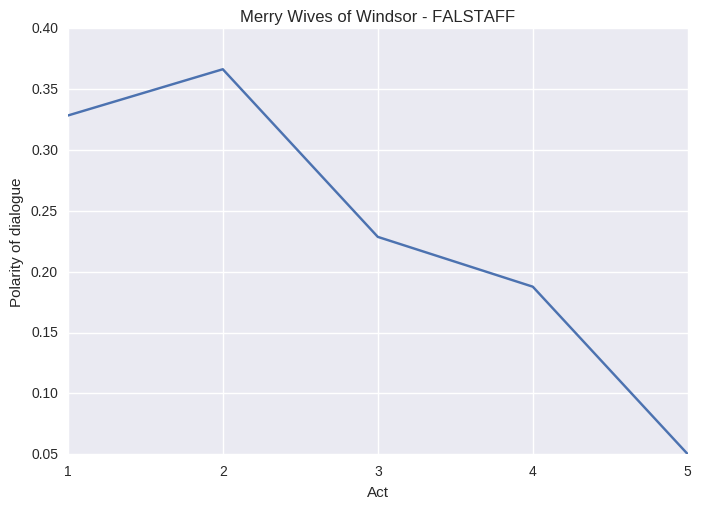

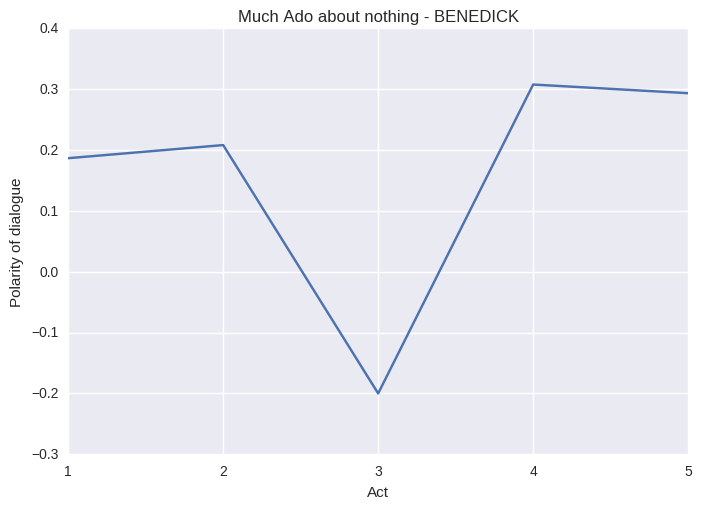

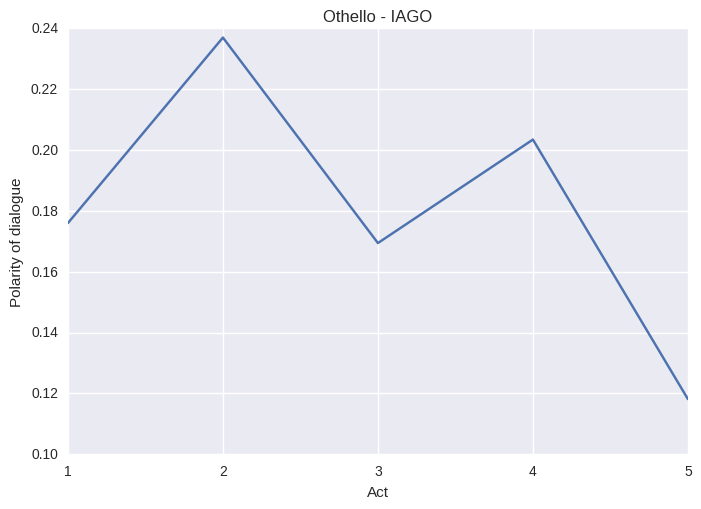

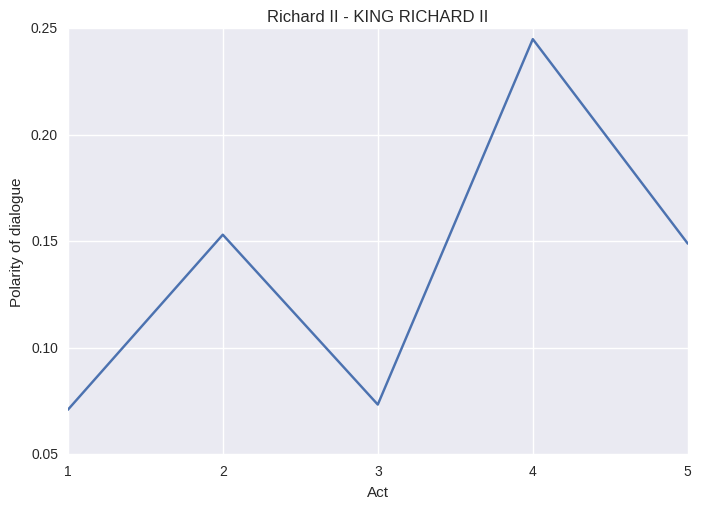

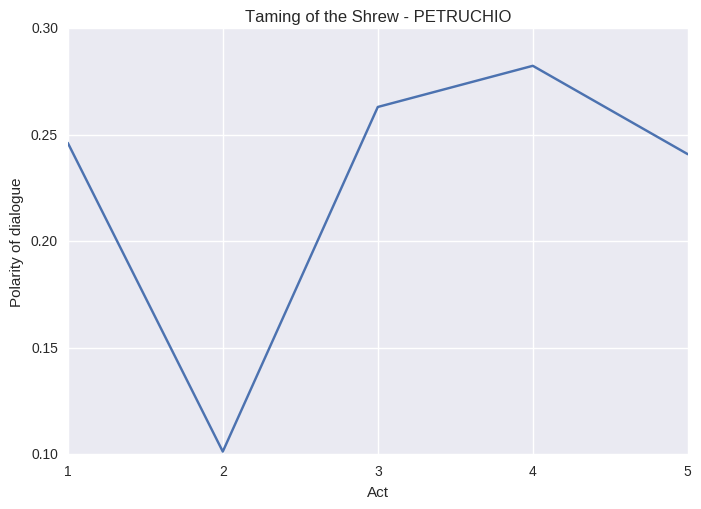

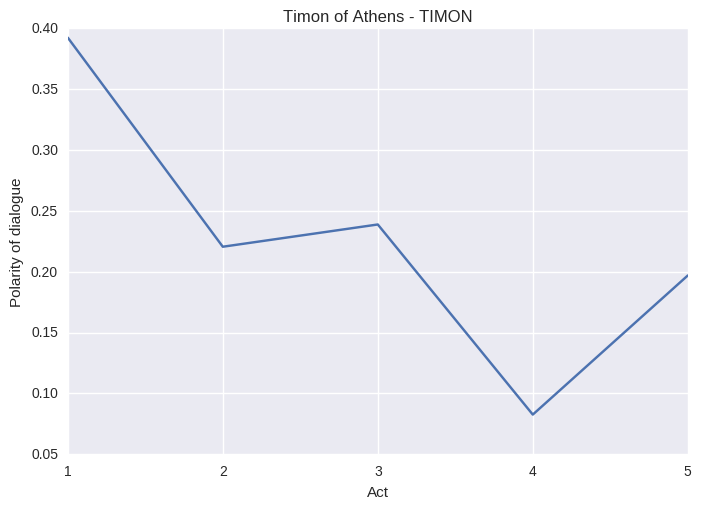

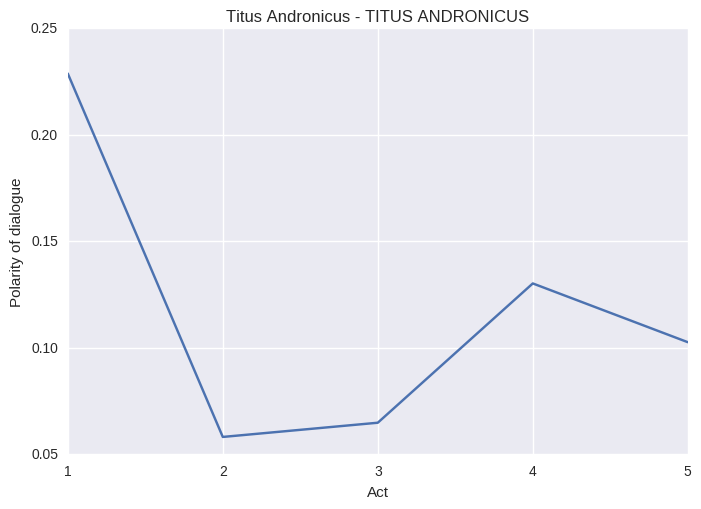

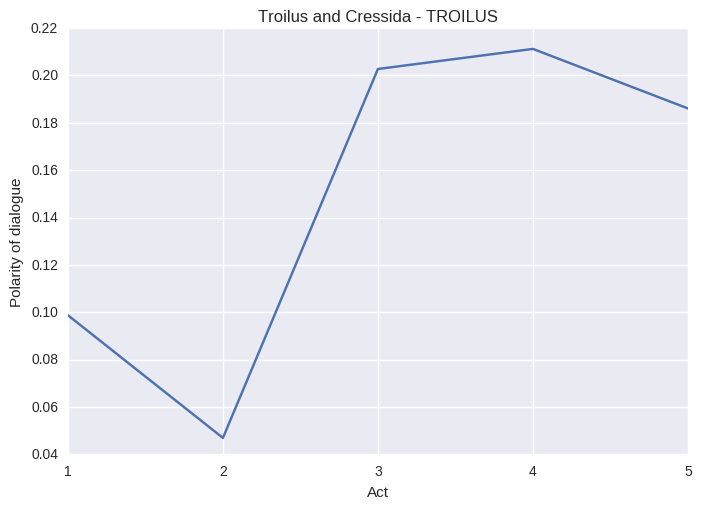

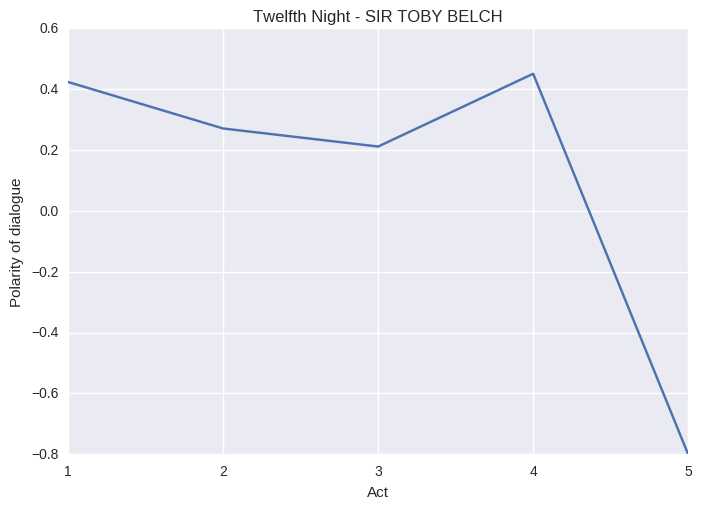

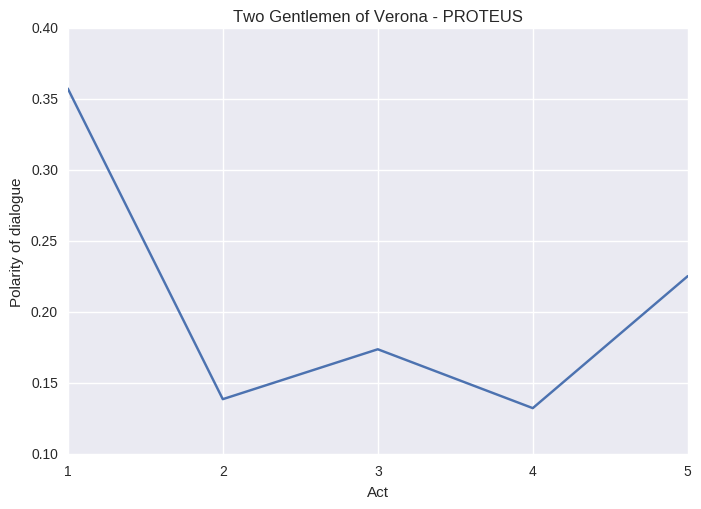

In [11]:
for play in data['Play'].unique().tolist():    
    indices  = data[data['Play'] == play][data['Player-Line'].str.contains('ACT')].index.tolist() 
    indices.append(data[data['Play'] == play][data['Player-Line'].str.contains('Exeunt')].index[-1])
    i=0
    z=[]
    p_line = data[data['Play']==play].groupby('Player').count().sort_values(by='Player-Line',ascending=False)['Player-Line']
    p_line = p_line.to_frame()
    p_line['Player'] = p_line.index.tolist()
    p_line.index = np.arange(0,len(p_line))
    p_line.columns=['Lines','Player']
    w=[]
    w = (p_line['Player'][0:3].tolist())
    while True:
        try:
            df = data[indices[i]:indices[i+1]].dropna()
            text  = ' '.join(df[df['Player'] == w[0]]['Player-Line'].tolist())
            blob = TextBlob(text)
            l= []
            for sentence in blob.sentences:
                if sentence.sentiment.polarity !=0:
                    l.append(sentence.sentiment.polarity)
            sns.set_style("darkgrid")
            z.append(sum(l)/len(l))
            i=i+1
        except:
            break
    try:
        X = [x for x in range(1,6)]
        plt.xticks(X)
        plt.plot(X,z)
        plt.xlabel('Act')
        plt.ylabel('Polarity of dialogue')
        plt.title(play + ' - ' + w[0])
        plt.show()
    except:
        pass

/home/nishant/.local/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/nishant/.local/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


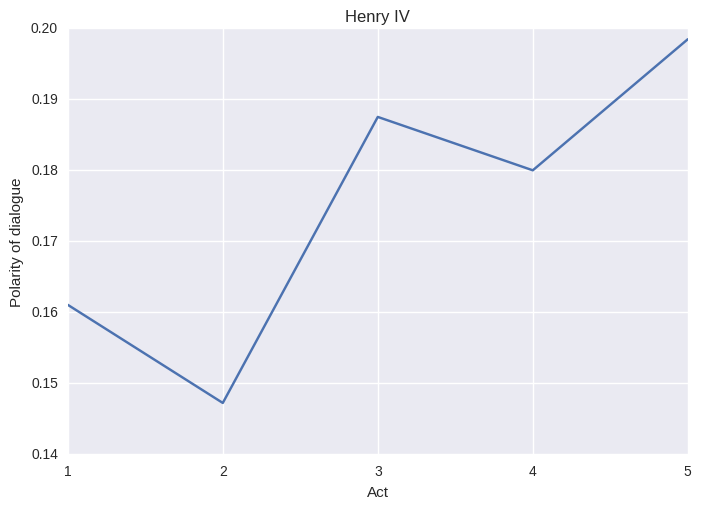

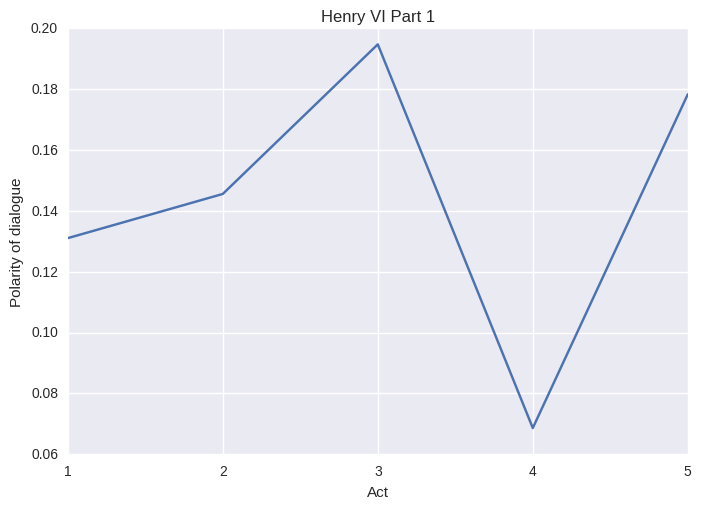

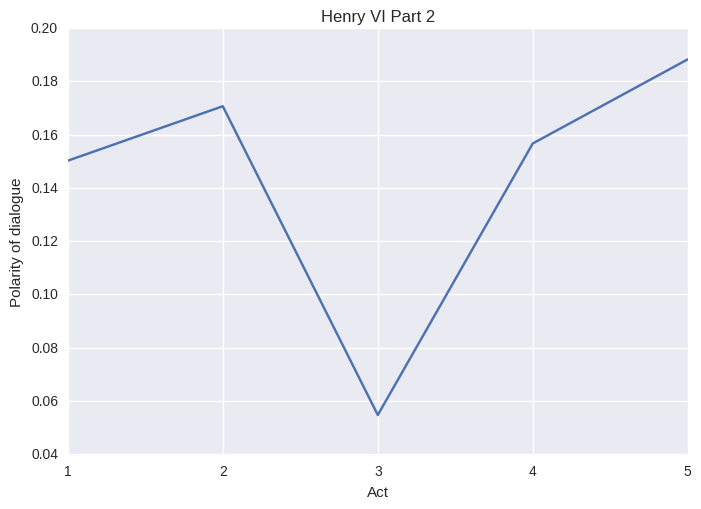

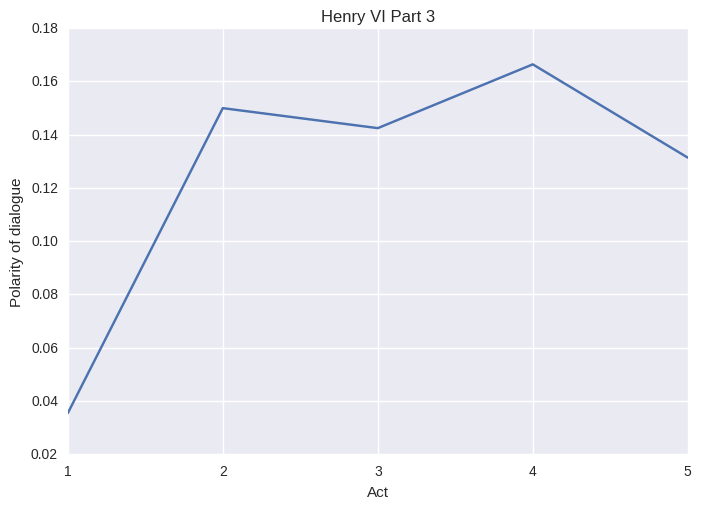

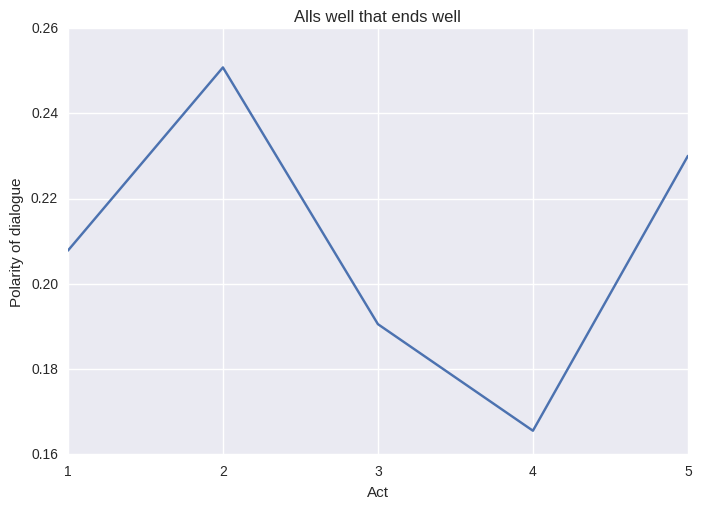

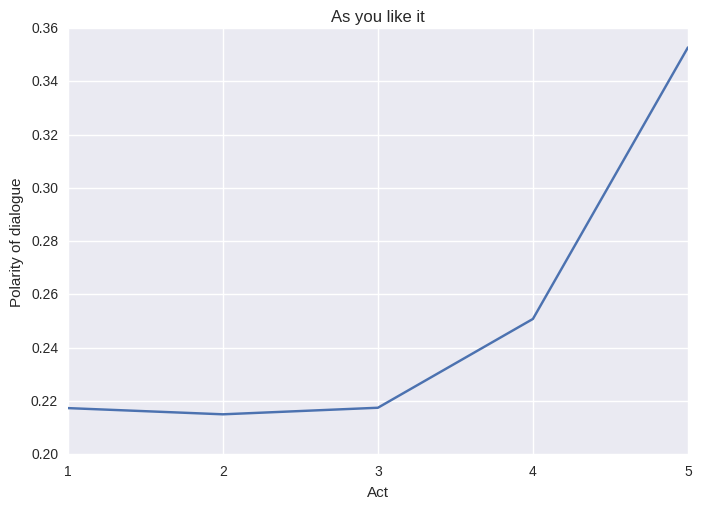

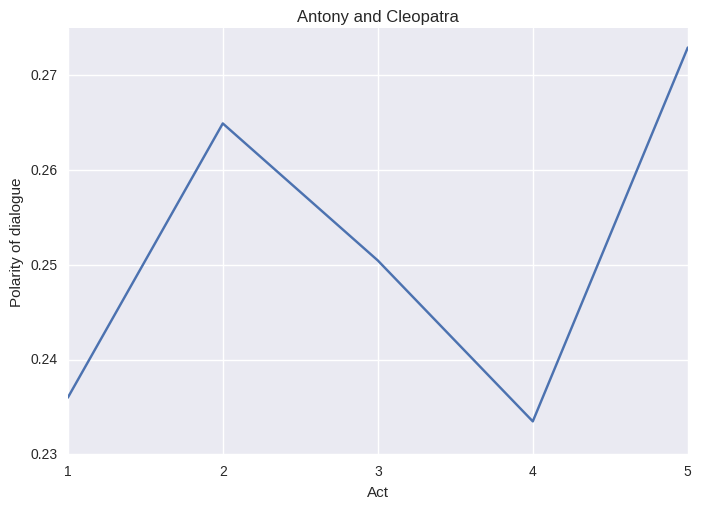

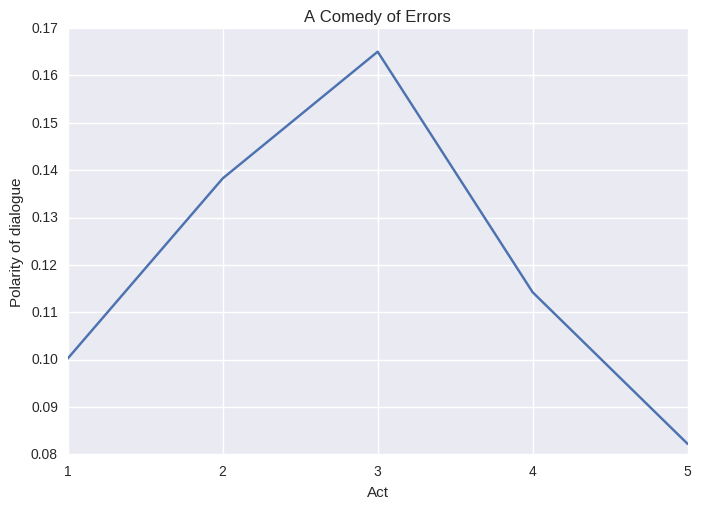

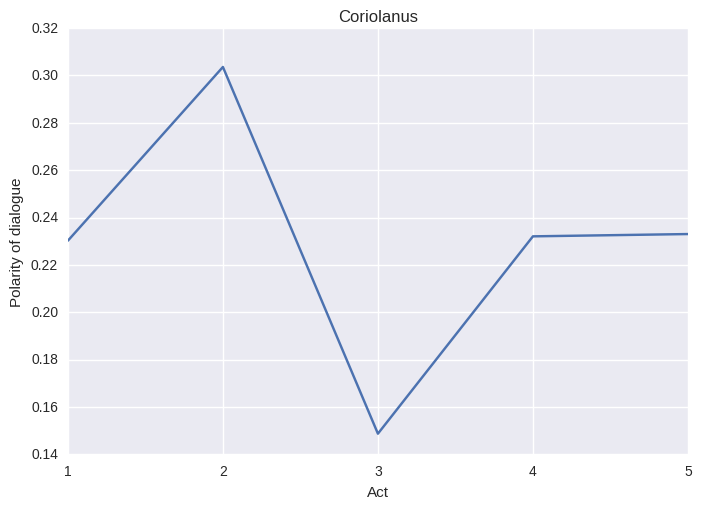

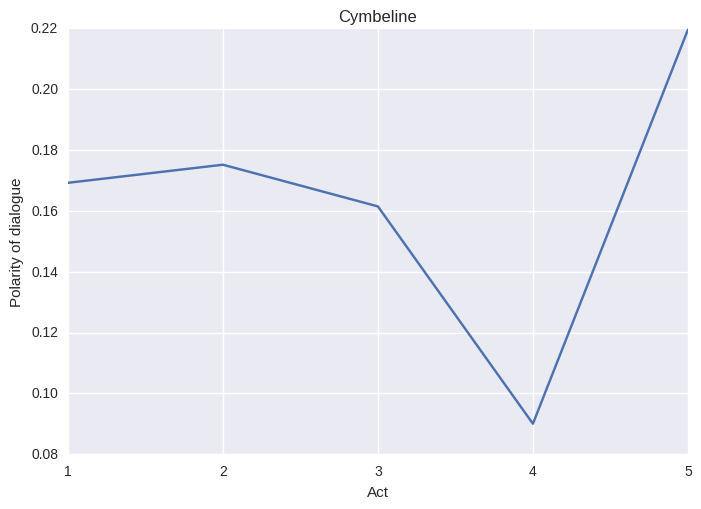

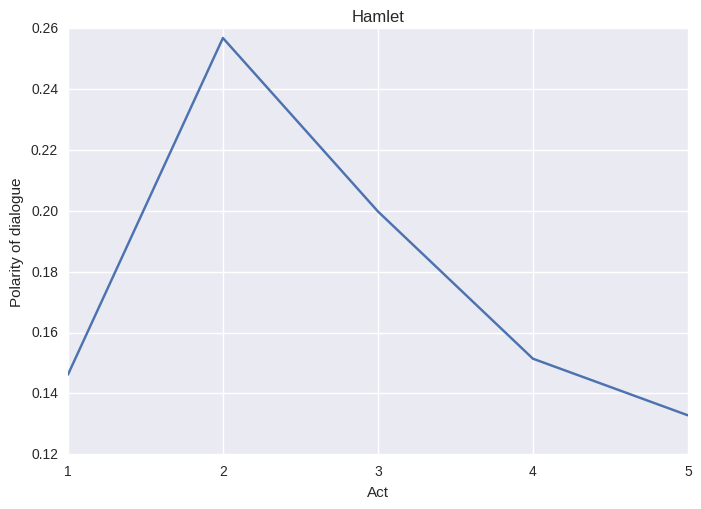

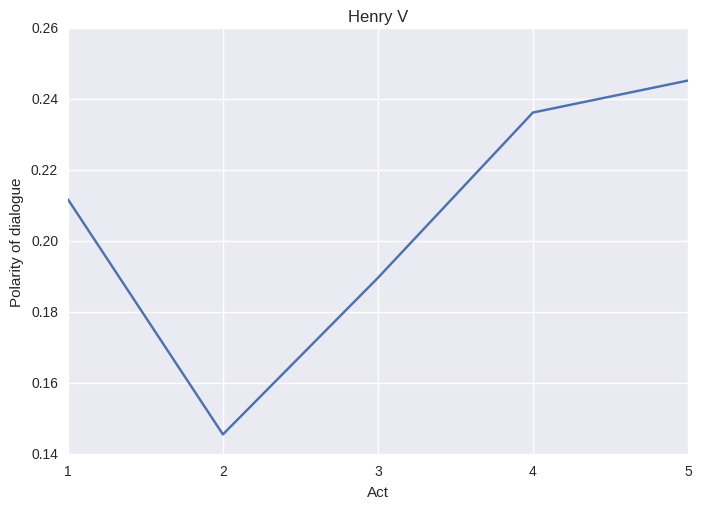

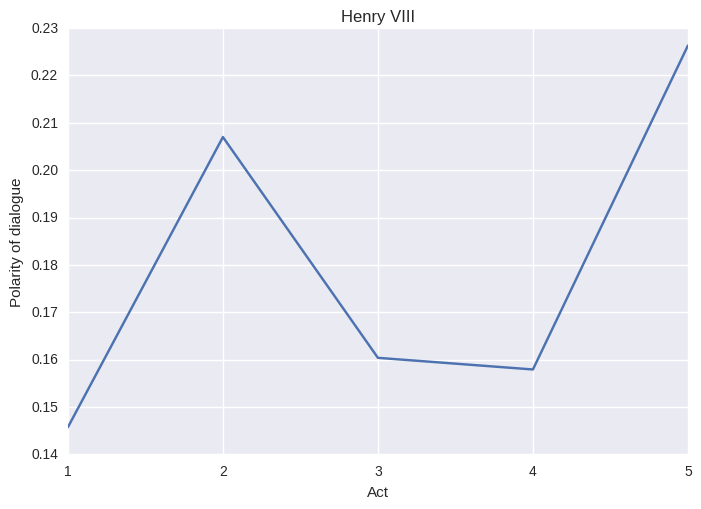

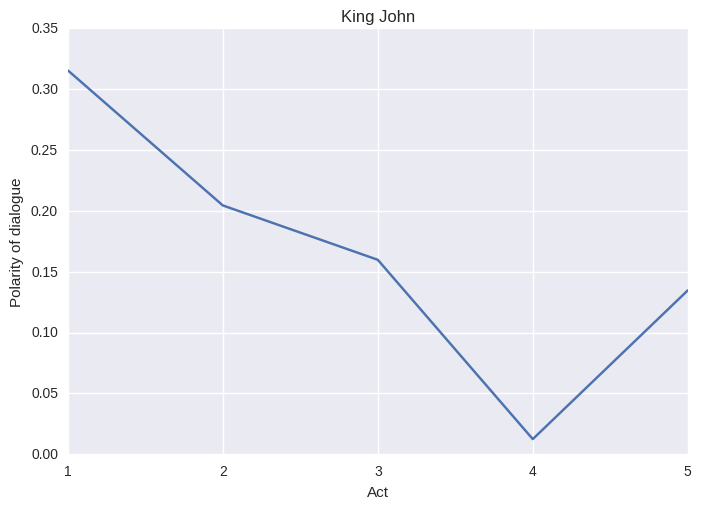

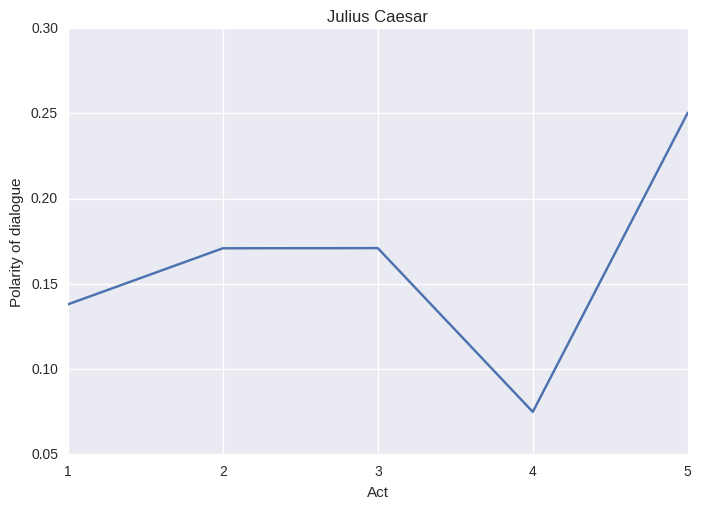

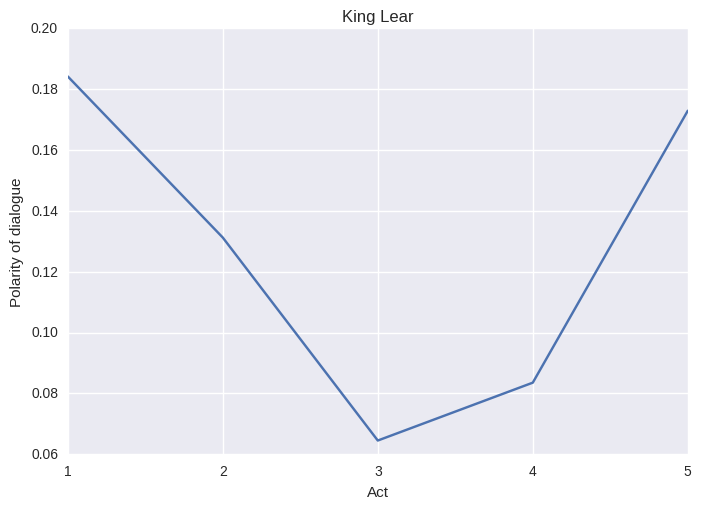

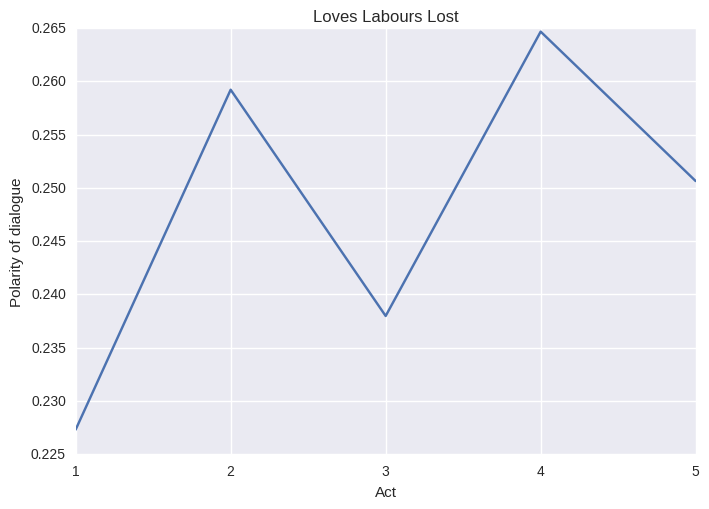

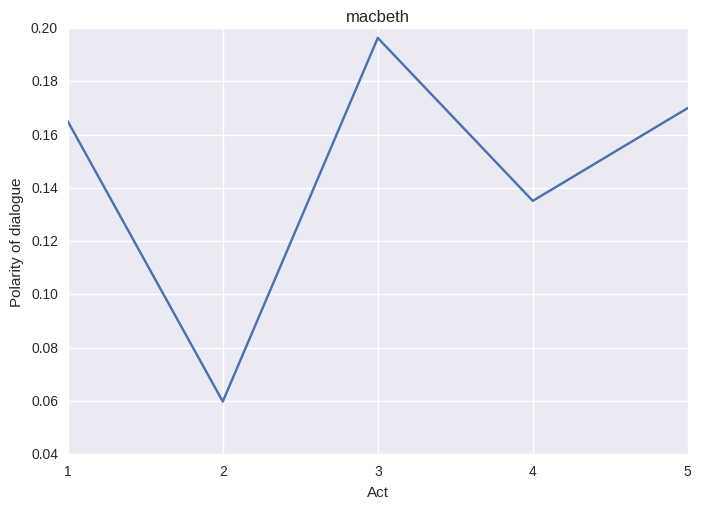

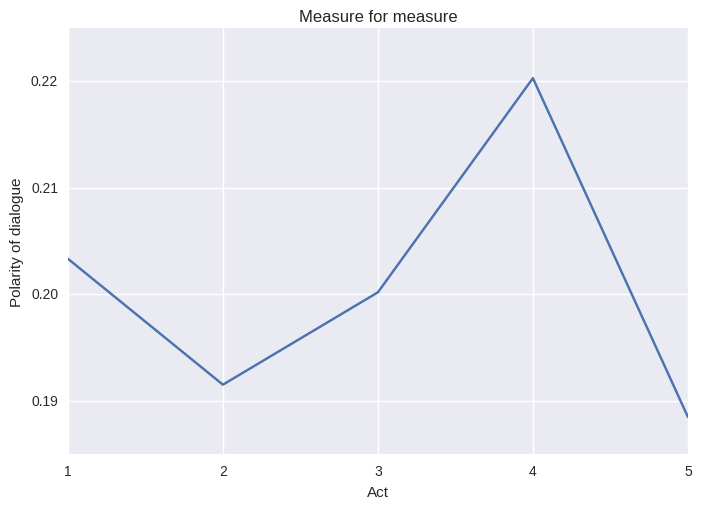

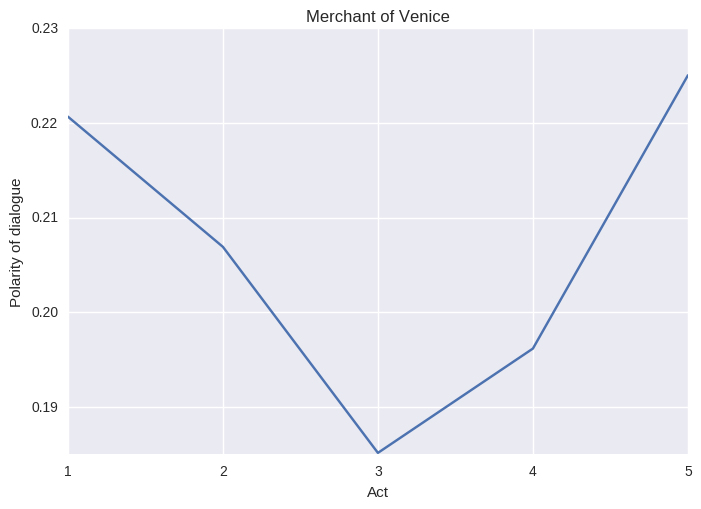

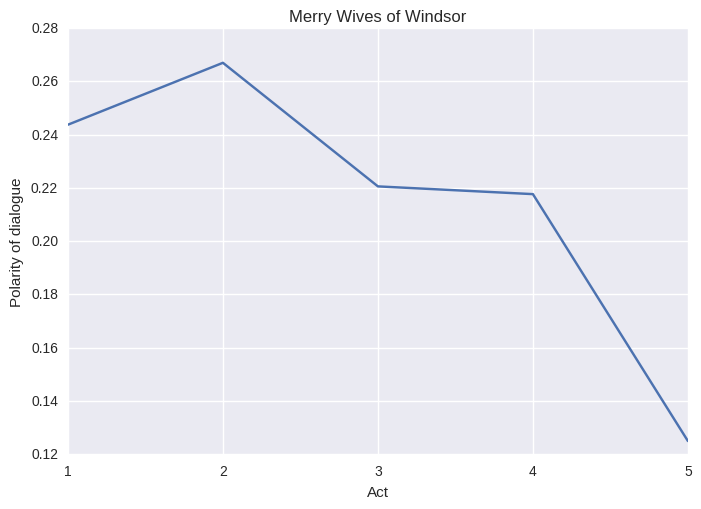

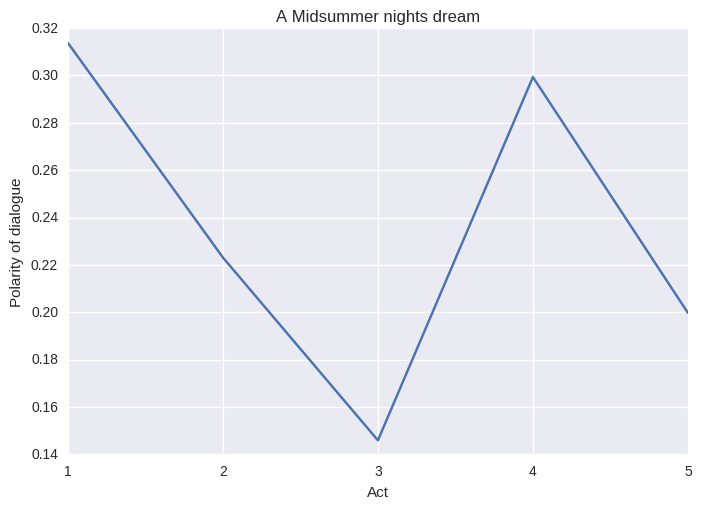

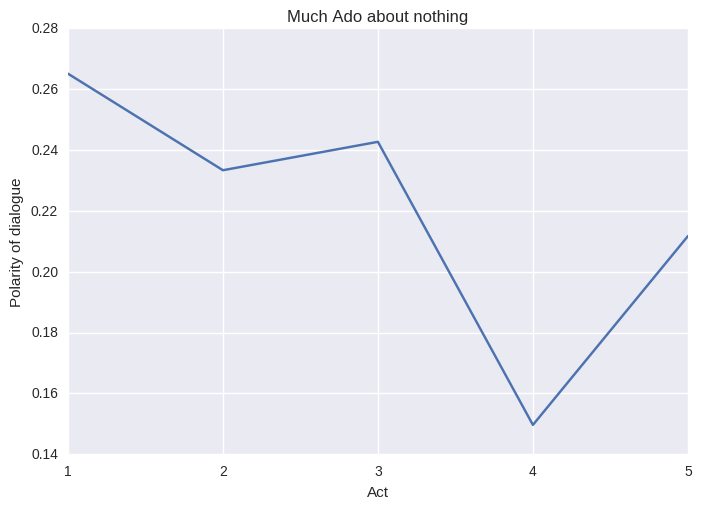

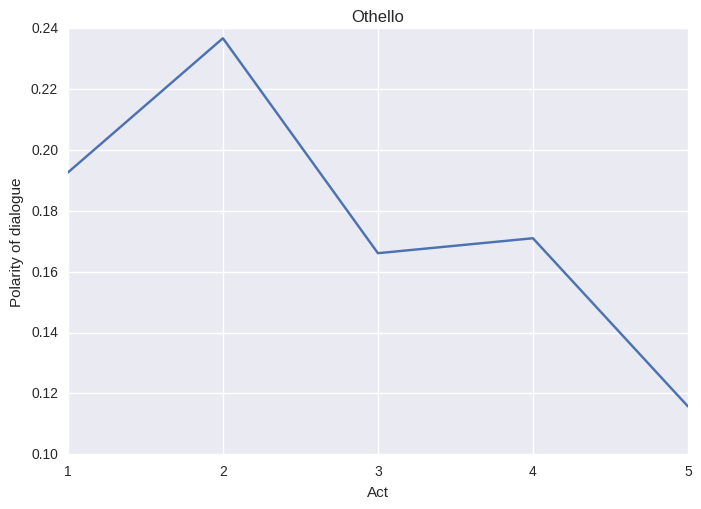

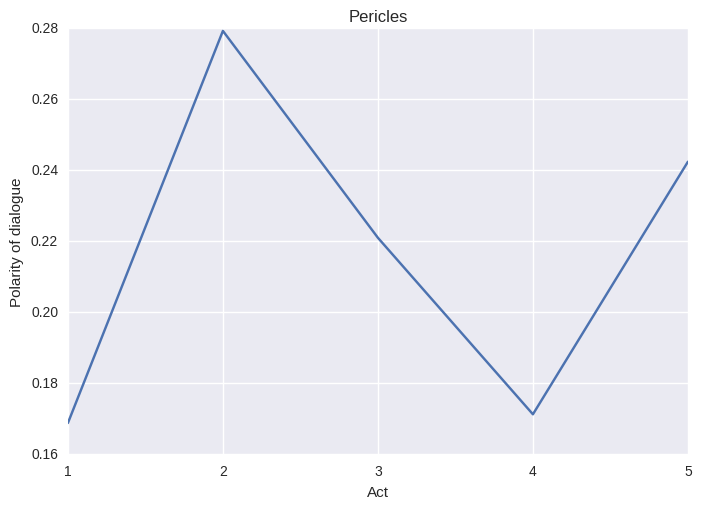

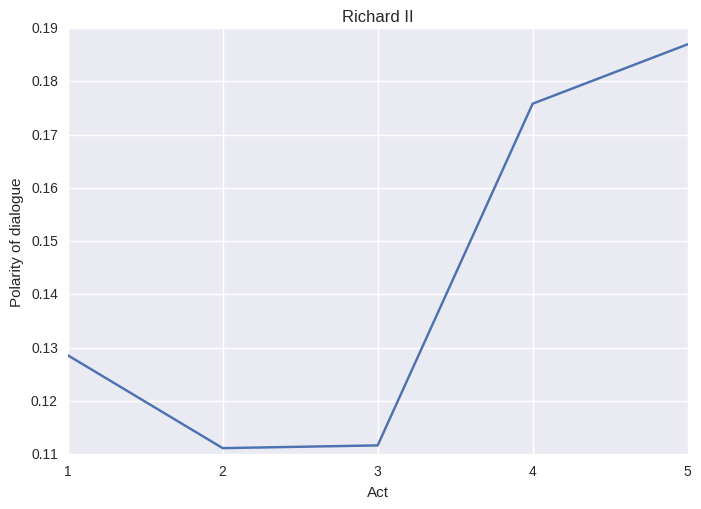

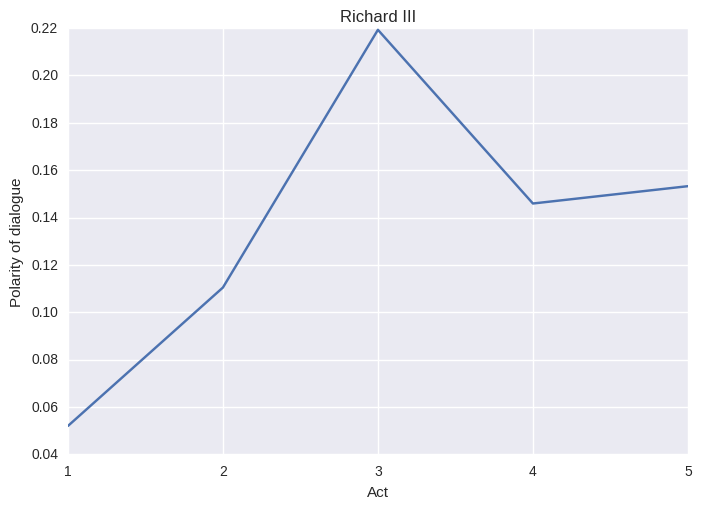

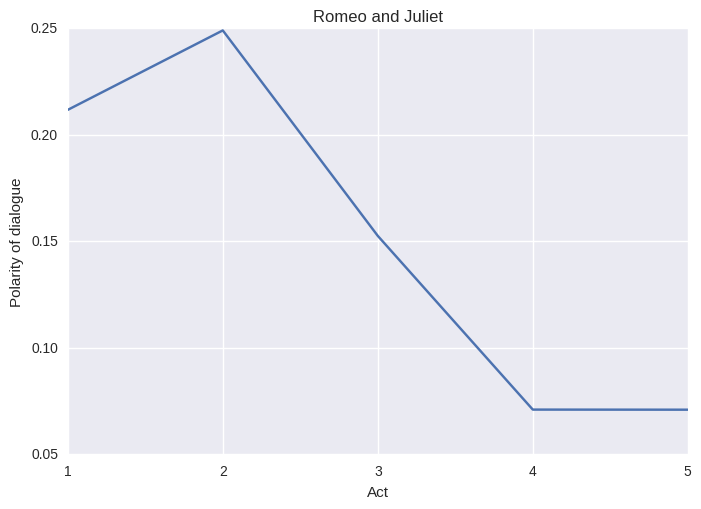

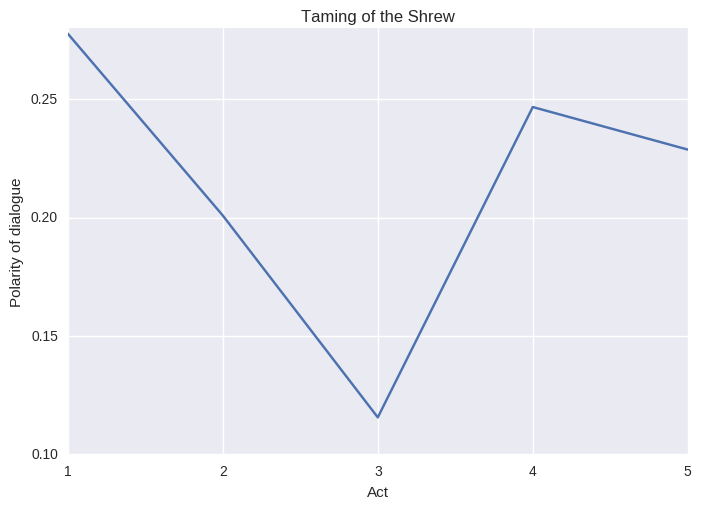

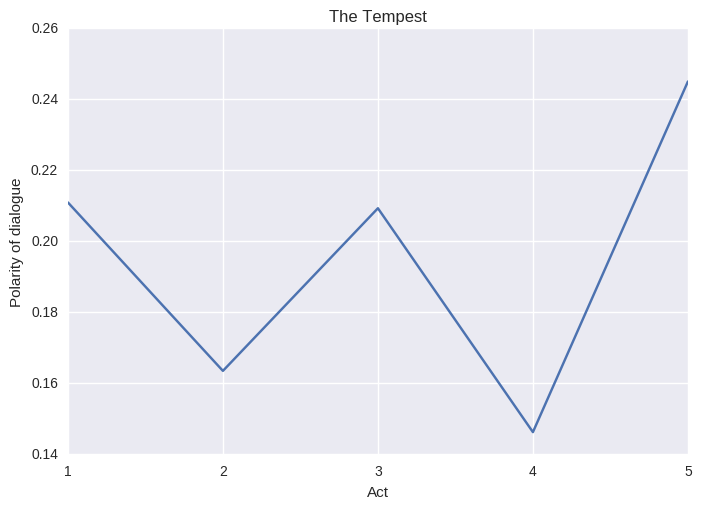

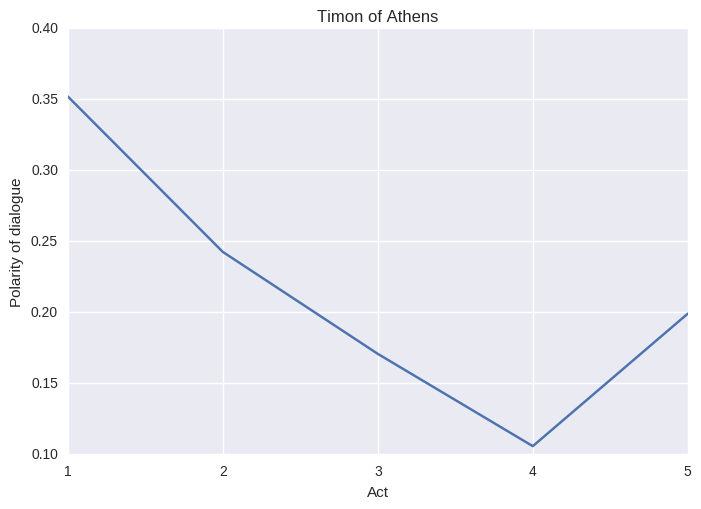

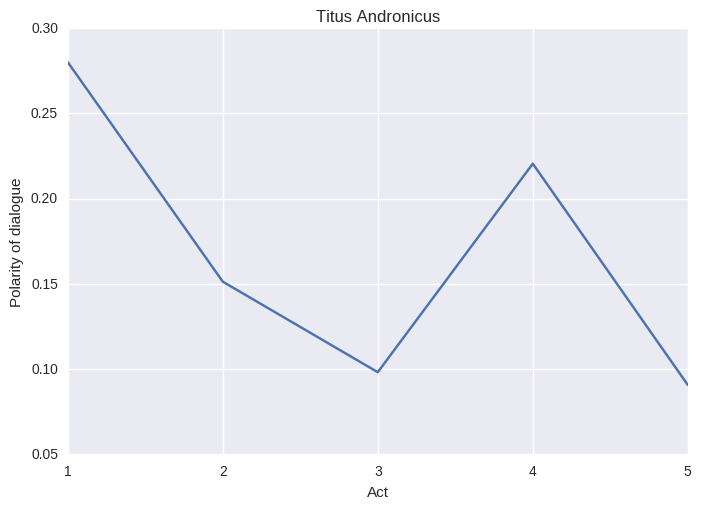

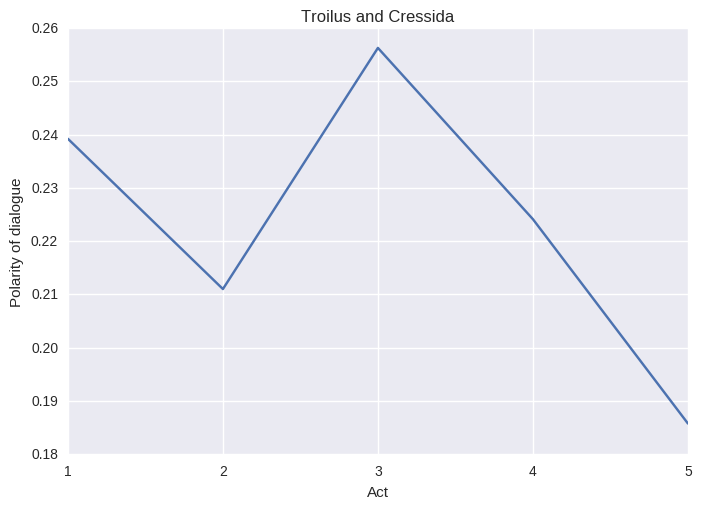

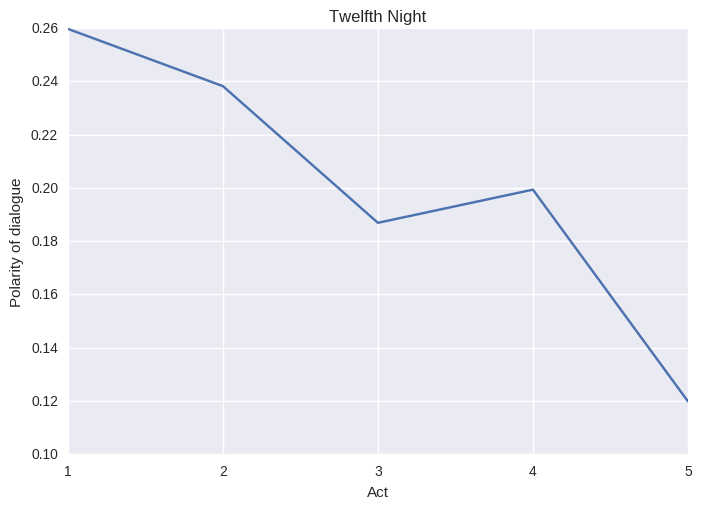

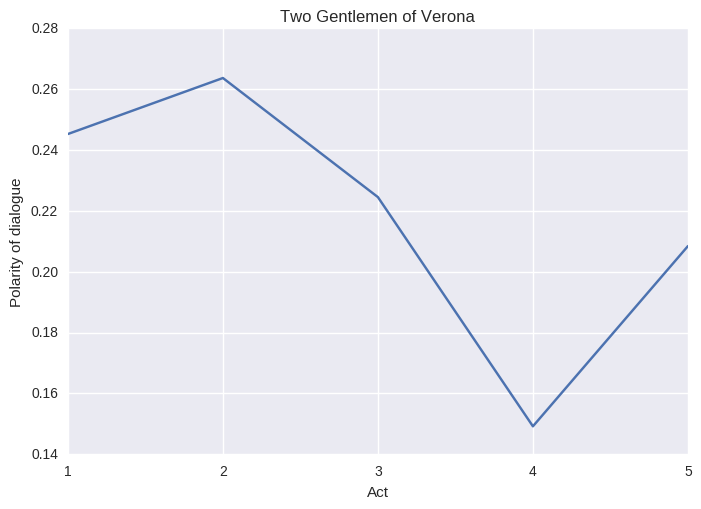

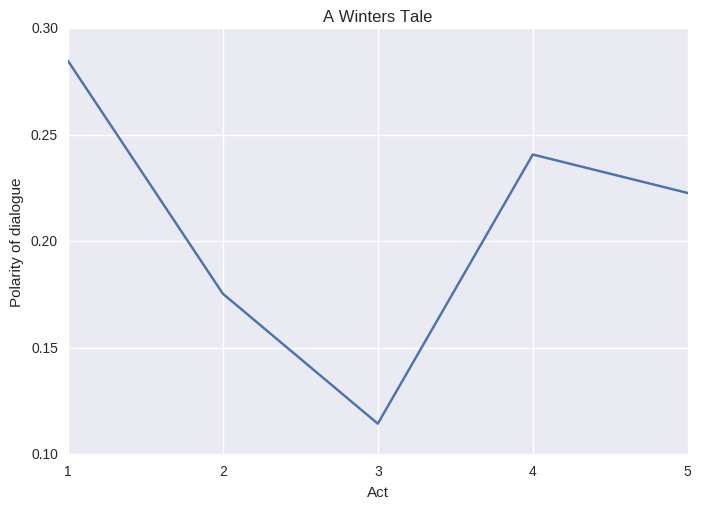

In [25]:
#As you like it , The Tempest , Alls well that ends well- Comedy
#Othello , Romeo and Juliet , King Lear almost follows the pattern , Titus Andronicus , Coriolanus - Tragedy
#Antony and Cleopatra doesn't conform to the pattern.
for play in data['Play'].unique().tolist():
    indices  = data[data['Play'] == play][data['Player-Line'].str.contains('ACT')].index.tolist() 
    indices.append(data[data['Play'] == play][data['Player-Line'].str.contains('Exeunt')].index[-1])
    i=0
    z=[]
    while True:
        try:
            df = data[indices[i]:indices[i+1]].dropna()
            text  = ' '.join(df['Player-Line'].tolist())
            blob = TextBlob(text)
            l= []
            for sentence in blob.sentences:
                if sentence.sentiment.polarity !=0:
                    l.append(sentence.sentiment.polarity)
            sns.set_style("darkgrid")
            z.append(sum(l)/len(l))
            i=i+1
        except:
            break
    X = [x for x in range(1,6)]
    plt.xticks(X)
    plt.plot(X,z)
    plt.xlabel('Act')
    plt.ylabel('Polarity of dialogue')
    plt.title(play)
    plt.show()

In [15]:
#SONNET ANALYSIS
data2 = pd.read_csv('input/Sonnets.csv')

In [156]:
data2.head()

,Number,Sonnet
0,29,"When, in disgrace with fortune and men's eyes,..."
1,30,When to the sessions of sweet silent thought I...
2,28,"How can I then return in happy plight, That am..."
3,24,Mine eye hath play'd the painter and hath stel...
4,27,"Weary with toil, I haste me to my bed, The dea..."


In [16]:
data2.iloc[np.argsort(data2['Number']), :]

,Number,Sonnet
153,1,"From fairest creatures we desire increase, Tha..."
152,2,"When forty winters shall beseige thy brow, And..."
151,3,"Look in thy glass, and tell the face thou view..."
150,4,"Unthrifty loveliness, why dost thou spend Upon..."
148,5,"Those hours, that with gentle work did frame T..."
149,6,Then let not winter's ragged hand deface In th...
145,7,Lo! in the orient when the gracious light Lift...
147,8,"Music to hear, why hear'st thou music sadly? S..."
146,9,Is it for fear to wet a widow's eye That thou ...
144,10,"For shame! deny that thou bear'st love to any,..."


In [17]:
text2 = '.'.join(data2['Sonnet'].tolist())

In [21]:
blob2 = TextBlob(text2)

In [24]:
asa= []
for q in data2['Sonnet']:
    blob2 = TextBlob(q)
    asa.append(blob2.sentiment.polarity)


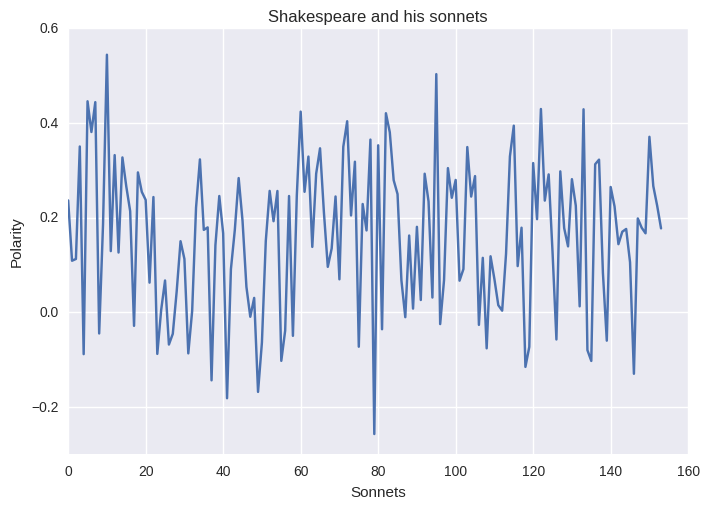

In [23]:
sns.set_style("darkgrid")
plt.plot(asa)
plt.xlabel('Sonnets')
plt.ylabel('Polarity')
plt.title('Shakespeare and his sonnets')
plt.show()

In [33]:
print("Polarity of sonnets 1-17" ,sum(asa[:17])/17)
print("Polarity of sonnets 18-154" ,sum(asa[17:])/(len(asa)-17))

Polarity of sonnets 1-17 0.23920684175333828
Polarity of sonnets 18-154 0.15018067575319188
